In [170]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [171]:
file=pd.read_excel("Merged files_1.xlsx",header=0)

In [172]:
X=file.loc[:,["Datum i vrijeme",'Temp.senzor un.6 24007412Temperatura (°C) (t-1)','Kalorimetar 1 39024788Kum.protok (m3) (t-1)',
       'Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)',
              #'Kalorimetar 1 39024788Tren.protok (m3/h) (t-1)','Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)',
       'Sat', #'Dan u sedmici',
       #'Mjesec', 'Godina', 'Kvartal', 'Dan u godini', 'Dan u mjesecu',#'Temp.senzor un.6 24007412Temperatura (°C) (t-1)',
        'Temp.senzor un.4 24004658Temperatura (°C) (t-1)',"Praznik","Radni sati"]]
        
#'Kalorimetar 1 39024788Temp.pol.voda (°C)',
       #'Kalorimetar 1 39024788Temp.pov.voda (°C)', 
        #'Temp.senzor vanj.1 25000099Temperatura (°C)',
       #'Temp.senzor vanj.1 25000099Vlažnost (%)', 
        #'Grijanje_K1','Broj sati grijanja_K1','Negrijano',   #'Sedmica',

In [173]:
#nan_values = df[df['first_set'].isna()]

#print (nan_values) #rijesiti

In [174]:
X.set_index(file["Datum i vrijeme"]).head(2)

,Datum i vrijeme,Temp.senzor un.6 24007412Temperatura (°C) (t-1),Kalorimetar 1 39024788Kum.protok (m3) (t-1),Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1),Sat,Temp.senzor un.4 24004658Temperatura (°C) (t-1),Praznik,Radni sati
Datum i vrijeme,,,,,,,,
2015-10-01 00:00:00,2015-10-01 00:00:00,NaN,NaN,NaN,0,NaN,0,0
2015-10-01 01:00:00,2015-10-01 01:00:00,21.74,322693.0,19.5,1,21.11,0,0


In [175]:
#X["Negrijano"]=X["Negrijano"].fillna(0)

In [176]:
Y=file.loc[:, ['Temp.senzor un.4 24004658Temperatura (°C)']]

In [177]:
feat_and_lab=pd.concat([X,Y],axis=1)

In [178]:
feat_and_lab.head(2)

,Datum i vrijeme,Temp.senzor un.6 24007412Temperatura (°C) (t-1),Kalorimetar 1 39024788Kum.protok (m3) (t-1),Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1),Sat,Temp.senzor un.4 24004658Temperatura (°C) (t-1),Praznik,Radni sati,Temp.senzor un.4 24004658Temperatura (°C)
0,2015-10-01 00:00:00,NaN,NaN,NaN,0,NaN,0,0,21.11
1,2015-10-01 01:00:00,21.74,322693.0,19.5,1,21.11,0,0,21.06


In [179]:
feat_and_lab.isna().sum()

Datum i vrijeme                                     0
Temp.senzor un.6 24007412Temperatura (°C) (t-1)    30
Kalorimetar 1 39024788Kum.protok (m3) (t-1)        30
Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)     30
Sat                                                 0
Temp.senzor un.4 24004658Temperatura (°C) (t-1)    30
Praznik                                             0
Radni sati                                          0
Temp.senzor un.4 24004658Temperatura (°C)          27
dtype: int64

In [180]:
feat_and_lab = feat_and_lab.dropna(subset=[#'Temp.senzor un.6 24007412Temperatura (°C) (t-1)',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)',
       'Praznik',
       'Radni sati',
       'Temp.senzor un.4 24004658Temperatura (°C)',], how='any')

In [181]:
feat_and_lab.columns

Index(['Datum i vrijeme', 'Temp.senzor un.6 24007412Temperatura (°C) (t-1)',
       'Kalorimetar 1 39024788Kum.protok (m3) (t-1)',
       'Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)', 'Sat',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)', 'Praznik',
       'Radni sati', 'Temp.senzor un.4 24004658Temperatura (°C)'],
      dtype='object')

In [182]:
#feat_and_lab["Diff_4_6"]=feat_and_lab['Temp.senzor un.4 24004658Temperatura (°C) (t-1)']-feat_and_lab['Temp.senzor un.6 24007412Temperatura (°C) (t-1)']

In [183]:
#feat_and_lab["Diff_4_pov"]=feat_and_lab['Temp.senzor un.4 24004658Temperatura (°C) (t-1)']-feat_and_lab["Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)"]

In [184]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X =feat_and_lab[list(feat_and_lab.columns[1:11])]
#X=X.drop(['Temp.senzor un.4 24004658Temperatura (°C) (t-1)','Temp.senzor un.6 24007412Temperatura (°C) (t-1)'],axis=1)

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
4,5320.776377,Temp.senzor un.4 24004658Temperatura (°C) (t-1)
7,5072.069716,Temp.senzor un.4 24004658Temperatura (°C)
0,534.996406,Temp.senzor un.6 24007412Temperatura (°C) (t-1)
1,60.037115,Kalorimetar 1 39024788Kum.protok (m3) (t-1)
2,17.618768,Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)
3,4.189645,Sat
6,2.462207,Radni sati
5,1.040853,Praznik


In [141]:
#X=X.drop(['Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)','Kalorimetar 1 39024788Kum.protok (m3) (t-1)'],axis=1)

In [185]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
4,5320.776377,Temp.senzor un.4 24004658Temperatura (°C) (t-1)
7,5072.069716,Temp.senzor un.4 24004658Temperatura (°C)
0,534.996406,Temp.senzor un.6 24007412Temperatura (°C) (t-1)
1,60.037115,Kalorimetar 1 39024788Kum.protok (m3) (t-1)
2,17.618768,Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)
3,4.189645,Sat
6,2.462207,Radni sati
5,1.040853,Praznik


In [143]:
#feat_and_lab=feat_and_lab.interpolate(method ="bfill")

In [144]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  ["Temp.senzor un.4 24004658Temperatura (°C) (t-1)"]

for column in core_columns:
    decomp = seasonal_decompose(feat_and_lab[column], period=24, model='additive', extrapolate_trend='freq')
    feat_and_lab[f"{column}_trend"] = decomp.trend
    feat_and_lab[f"{column}_seasonal"] = decomp.seasonal

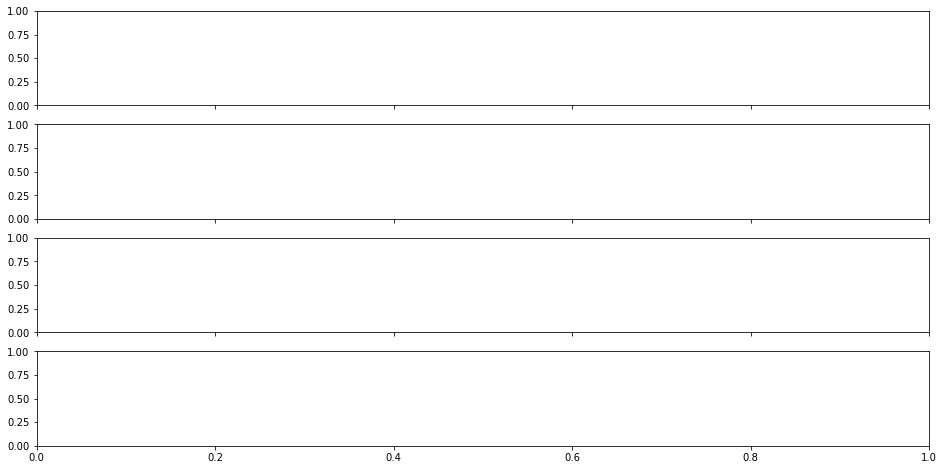

In [145]:
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(16,8))

#for i, column in enumerate(core_columns):
    
    #res = seasonal_decompose(feat_and_lab[column], freq=24, model='additive', extrapolate_trend='freq')

   # ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
   # res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
 #   ax[0,i].set_ylabel('Observed', fontsize=14)

  #  res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
#    ax[1,i].set_ylabel('Trend', fontsize=14)

    #res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    #ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
   # res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
   # ax[3,i].set_ylabel('Residual', fontsize=14)

#plt.show()

#XGB

In [186]:
split_date = '10/01/2017  00:00:00 AM'
feat_train = feat_and_lab.loc[feat_and_lab["Datum i vrijeme"] <= split_date].copy()
feat_test = feat_and_lab.loc[feat_and_lab["Datum i vrijeme"]> split_date].copy()

In [187]:
len(feat_train.columns)

9

In [188]:
feat_train.columns

Index(['Datum i vrijeme', 'Temp.senzor un.6 24007412Temperatura (°C) (t-1)',
       'Kalorimetar 1 39024788Kum.protok (m3) (t-1)',
       'Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)', 'Sat',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)', 'Praznik',
       'Radni sati', 'Temp.senzor un.4 24004658Temperatura (°C)'],
      dtype='object')

In [189]:
#feat_train=feat_train.drop(['Temp.senzor un.6 24007412Temperatura (°C) (t-1)',
       #'Kalorimetar 1 39024788Kum.protok (m3) (t-1)','Temp.senzor un.4 24004658Temperatura (°C) (t-1)','Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)'],axis=1)

In [190]:
#%pip install xgboost
import xgboost as xgb
from xgboost import plot_importance

In [191]:
feat_train.columns

Index(['Datum i vrijeme', 'Temp.senzor un.6 24007412Temperatura (°C) (t-1)',
       'Kalorimetar 1 39024788Kum.protok (m3) (t-1)',
       'Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)', 'Sat',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)', 'Praznik',
       'Radni sati', 'Temp.senzor un.4 24004658Temperatura (°C)'],
      dtype='object')

In [152]:
new_cols = ['Datum i vrijeme', 'Sat', 'Praznik', 'Radni sati',
       'Diff_4_6', 'Diff_4_pov','Temp.senzor un.4 24004658Temperatura (°C)',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)_trend',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)_seasonal']

feat_train=feat_train.reindex(columns=new_cols)
feat_test=feat_test.reindex(columns=new_cols)

In [192]:
reg = xgb.XGBRegressor(n_estimators=10000)
reg.fit(feat_train.iloc[:,1:8], feat_train.iloc[:,8],
        eval_set=[(feat_train.iloc[:,1:8], feat_train.iloc[:,8]), (feat_test.iloc[:,1:8], feat_test.iloc[:,8])],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

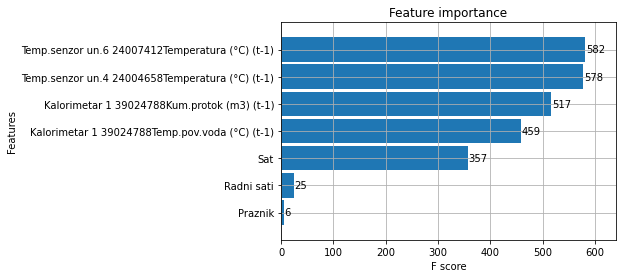

In [193]:
plot_importance(reg, height=0.9)
plt.show()

In [194]:
feat_test.columns

Index(['Datum i vrijeme', 'Temp.senzor un.6 24007412Temperatura (°C) (t-1)',
       'Kalorimetar 1 39024788Kum.protok (m3) (t-1)',
       'Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)', 'Sat',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)', 'Praznik',
       'Radni sati', 'Temp.senzor un.4 24004658Temperatura (°C)'],
      dtype='object')

In [196]:
feat_test['Prediction'] = reg.predict(feat_test.iloc[:,1:8])

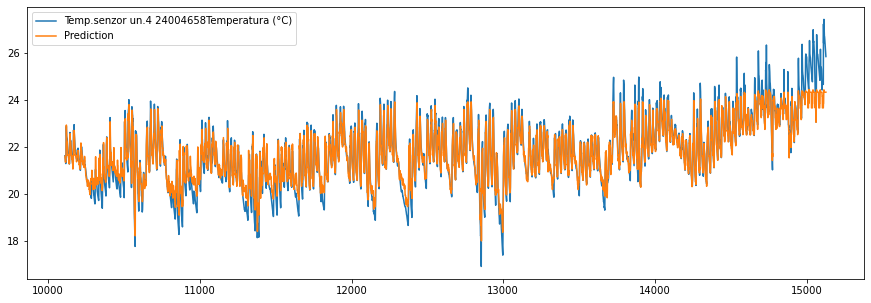

In [197]:
feat_test[['Temp.senzor un.4 24004658Temperatura (°C)','Prediction']].plot(figsize=(15, 5))
plt.show()

In [198]:
feat_test['error'] =feat_test['Temp.senzor un.4 24004658Temperatura (°C)'] - feat_test['Prediction']
feat_test['abs_error'] = feat_test['error'].apply(np.abs)
#error_by_day = feat_test.groupby(['Godina','Mjesec','Dan u mjesecu']).mean()[['Temp.senzor un.4 24004658Temperatura (°C)','Prediction','error','abs_error']]

In [199]:
#error_by_day.sort_values('error', ascending=True).head(10)

In [200]:
#error_by_day.sort_values('abs_error', ascending=True).head(10)

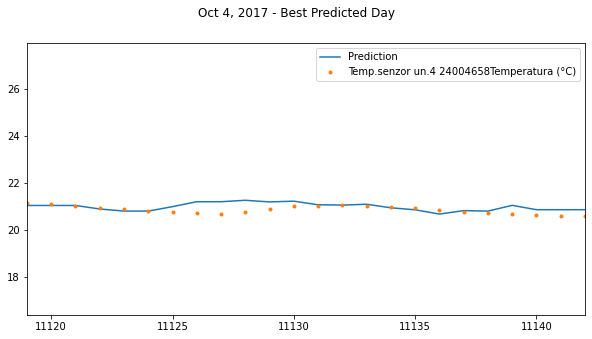

In [201]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ =feat_test[['Prediction','Temp.senzor un.4 24004658Temperatura (°C)']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower=feat_test[feat_test["Datum i vrijeme"]=='11/12/2017  00:00:00 AM'].index.values, upper=feat_test[feat_test["Datum i vrijeme"]=='11/12/2017  11:00:00 PM'].index.values)
plot = plt.suptitle('Oct 4, 2017 - Best Predicted Day')
plt.show()

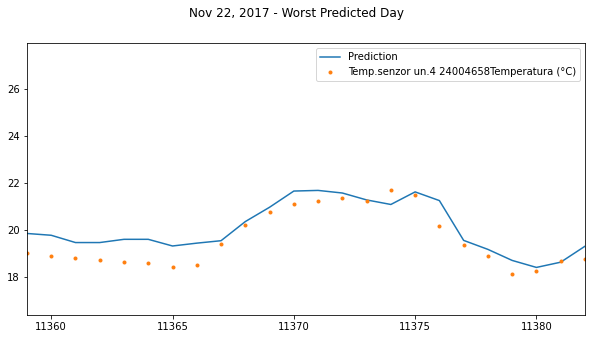

In [202]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ =feat_test[['Prediction','Temp.senzor un.4 24004658Temperatura (°C)']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower=feat_test[feat_test["Datum i vrijeme"]=='11/22/2017  00:00:00 AM'].index.values, upper=feat_test[feat_test["Datum i vrijeme"]=='11/22/2017  11:00:00 PM'].index.values)
plot = plt.suptitle('Nov 22, 2017 - Worst Predicted Day')
plt.show()

In [203]:
# Calcuate metrics


score_mae = mean_absolute_error(feat_test['Temp.senzor un.4 24004658Temperatura (°C)'], feat_test['Prediction'])
score_rmse = math.sqrt(mean_absolute_error(feat_test['Temp.senzor un.4 24004658Temperatura (°C)'], feat_test['Prediction']))

print('RMSE: {}'.format(score_rmse))

RMSE: 0.5359063404064365


In [40]:
#for col in feat_and_lab.columns:
    #feat_and_lab[col] = feat_and_lab[col].interpolate(method="bfill")

In [41]:
#feat_and_lab.columns

In [42]:
#columns1=feat_and_lab.columns
#downsample=feat_and_lab[columns1].resample("1D", on="Datum i vrijeme").mean()

#feat_and_lab_1= downsample.copy()

In [43]:
feat_and_lab.isna().sum()

Datum i vrijeme                                             0
Sat                                                         0
Temp.senzor un.4 24004658Temperatura (°C) (t-1)             0
Praznik                                                     0
Radni sati                                                  0
Temp.senzor un.4 24004658Temperatura (°C)                   0
Temp.senzor un.4 24004658Temperatura (°C) (t-1)_trend       0
Temp.senzor un.4 24004658Temperatura (°C) (t-1)_seasonal    0
dtype: int64

In [44]:


#feat_and_lab ['Sezona'] = feat_and_lab['Mjesec'] % 12 // 3 + 1


In [45]:
from statsmodels.tsa.arima_model import ARIMA
#aa=feat_and_lab.index.values
aa=feat_and_lab.index

In [46]:
feat_and_lab.columns

Index(['Datum i vrijeme', 'Sat',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)', 'Praznik',
       'Radni sati', 'Temp.senzor un.4 24004658Temperatura (°C)',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)_trend',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)_seasonal'],
      dtype='object')

In [47]:
#univariate_df["Datum i vrijeme"]=aa
univariate_df=pd.DataFrame()
univariate_df[ 'Datum i vrijeme']=feat_and_lab[ 'Datum i vrijeme'].values
#univariate_df["Temp.senzor vanj.1 25000099Temperatura (°C)"]=feat_and_lab_1["Temp.senzor vanj.1 25000099Temperatura (°C)"].values
#univariate_df['Temp.senzor un.6 (t-1)']=feat_and_lab['Temp.senzor un.6 24007412Temperatura (°C) (t-1)'].values
univariate_df['Temp.senzor un.4(t-1)']=feat_and_lab['Temp.senzor un.4 24004658Temperatura (°C) (t-1)'].values
univariate_df[ 'Sat']=feat_and_lab[ 'Sat'].values
#univariate_df[ 'Dan u sedmici']=feat_and_lab[ 'Dan u sedmici'].values
#univariate_df[  'Mjesec']=feat_and_lab[ 'Mjesec'].values
#univariate_df[ 'Godina']=feat_and_lab[ 'Godina'].values
#Univariate_df[ 'Kvartal']=feat_and_lab[ 'Kvartal'].values
#univariate_df[ 'Dan u godini']=feat_and_lab['Dan u godini'].values
#univariate_df[ 'Dan u mjesecu']=feat_and_lab[ 'Dan u mjesecu'].values
univariate_df[ 'Praznik']=feat_and_lab[ 'Praznik'].values
univariate_df['Radni sati']=feat_and_lab[ 'Radni sati'].values
univariate_df["Temp "]=feat_and_lab['Temp.senzor un.4 24004658Temperatura (°C)'].values



#univariate_df["Plin, m3"]=feat_and_lab_1["Plin, m3"].values

In [48]:
univariate_df.corr()

,Temp.senzor un.4(t-1),Sat,Praznik,Radni sati,Temp
Temp.senzor un.4(t-1),1.000000,0.218989,-0.114618,0.291507,0.979458
Sat,0.218989,1.000000,0.000235,0.131601,0.185366
Praznik,-0.114618,0.000235,1.000000,-0.026929,-0.115848
Radni sati,0.291507,0.131601,-0.026929,1.000000,0.335170
Temp,0.979458,0.185366,-0.115848,0.335170,1.000000


In [49]:
len(univariate_df.columns)


6

In [50]:
train_size = int(0.85 * len(feat_and_lab))
test_size = len(feat_and_lab) - train_size


train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame((univariate_df.iloc[:train_size, :5])),  pd.DataFrame((univariate_df.iloc[:train_size,5]))
x_valid, y_valid = pd.DataFrame((univariate_df.iloc[train_size:,:5])), pd.DataFrame((univariate_df.iloc[train_size:, 5]))

print(len(train), len(x_valid))

12829 2265


In [51]:
y_valid

,Temp
12829,22.12
12830,22.22
12831,21.67
12832,21.12
12833,20.83
...,...
15089,26.18
15090,26.07
15091,25.99
15092,25.89


In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [53]:
y_train

,Temp
0,21.06
1,21.04
2,21.01
3,20.98
4,20.94
...,...
12824,20.28
12825,20.90
12826,21.43
12827,21.82


In [47]:
y_train.isna().sum()

Temp     0
dtype: int64

In [48]:
y_train.interpolate()

,Temp
0,21.06
1,21.04
2,21.01
3,20.98
4,20.94
...,...
12799,21.76
12800,22.16
12801,22.60
12802,22.84


In [49]:
# Fit model
model = ARIMA(y_train.interpolate(), order=(2,0,1))
model_fit = model.fit()

# Prediction with ARIMA
y_pred, se, conf = model_fit.forecast(2260)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print('RMSE: {}'.format(score_rmse))

C:\Users\Ehlimana\anaconda3\envs\Ehlimana\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


RMSE: 2.1662073085433136


In [50]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(y_train.interpolate(), start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4900.666, Time=1.76 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114127.760, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.78 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=2.31 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4313.949, Time=2.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.58 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4308.919, Time=4.73 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=6.18 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=17.94 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4303.476, Time=3.51 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4446.394, Time=2.01 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=4300.089, Time=7.37 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=4303.523, Time=2.74 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=4308.175, Time=20.66 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=3848.341, Ti

C:\Users\Ehlimana\anaconda3\envs\Ehlimana\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


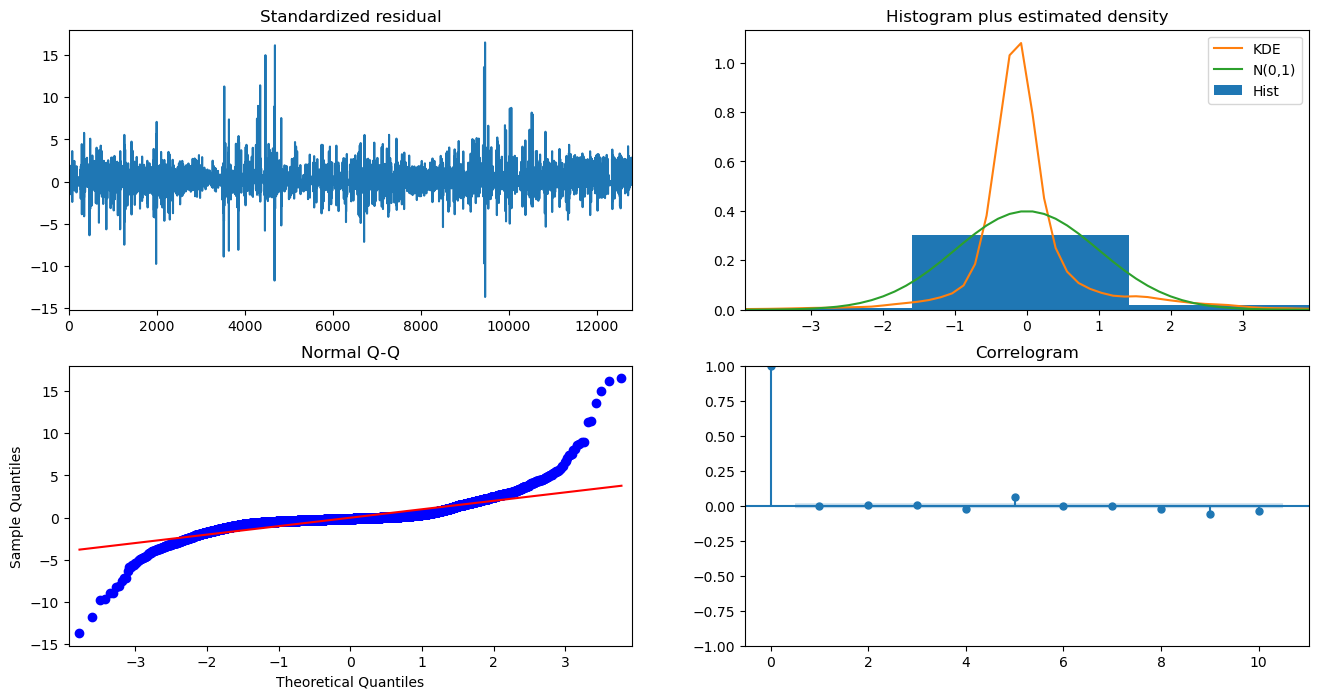

In [51]:
model.plot_diagnostics(figsize=(16,8))
plt.show()


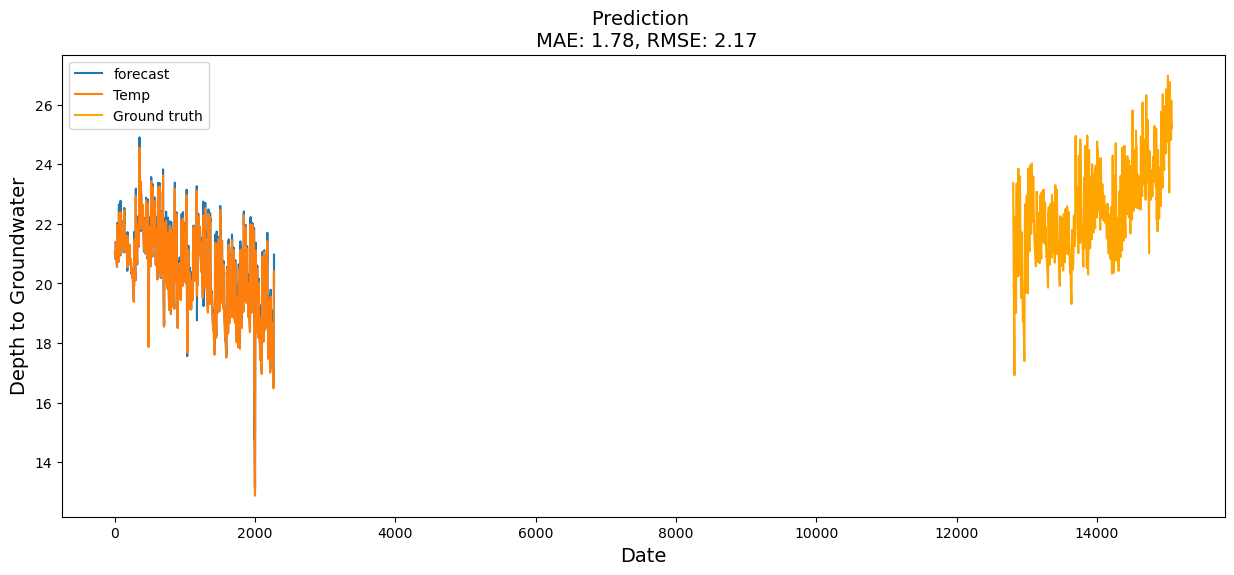

In [52]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model_fit.plot_predict(1, 2270, ax=ax)
sns.lineplot(x=x_valid.index, y=y_valid['Temp '], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

In [53]:
#univariate_df["Datum i vrijeme"]=aa
#univariate_df=pd.DataFrame()
#univariate_df["Temp.senzor vanj.1 25000099Temperatura (°C)"]=feat_and_lab_1["Temp.senzor vanj.1 25000099Temperatura (°C)"].values
#univariate_df['T pol (t-1)']=feat_and_lab['T pol (t-1)'].values
#univariate_df['T pov (t-1)']=feat_and_lab['T pov (t-1)'].values
#univariate_df['T vanj(t-1)']=feat_and_lab['T vanj(t-1)'].values
#univariate_df['T prost (t-1)']=feat_and_lab['T prost (t-1)'].values
#univariate_df['Grijanje_K1']=feat_and_lab['Grijanje_K1'].values
#univariate_df[ 'Broj sati grijanja']=feat_and_lab[ 'Broj sati grijanja_K1'].values
#univariate_df[ 'Negrijano']=feat_and_lab[ 'Negrijano'].values
#univariate_df[ 'Sat']=feat_and_lab[ 'Sat'].values
#univariate_df[ 'Dan u sedmici']=feat_and_lab[ 'Dan u sedmici'].values
#univariate_df[  'Mjesec']=feat_and_lab[ 'Mjesec'].values
#univariate_df[ 'Godina']=feat_and_lab[ 'Godina'].values
#univariate_df[ 'Kvartal']=feat_and_lab[ 'Kvartal'].values
#univariate_df[ 'Dan u godini']=feat_and_lab['Dan u godini'].values
#univariate_df[ 'Dan u mjesecu']=feat_and_lab[ 'Dan u mjesecu'].values
#univariate_df[ 'Datum i vrijeme']=feat_and_lab[ 'Datum i vrijeme'].values

#univariate_df["Temp "]=feat_and_lab['Temp.senzor un.4 24004658Temperatura (°C)'].values



#univariate_df["Plin, m3"]=feat_and_lab_1["Plin, m3"].values

In [59]:
univariate_df

,Datum i vrijeme,Temp.senzor un.4(t-1),Sat,Praznik,Radni sati,Temp
0,2015-10-01 01:00:00,21.11,1,0.0,0.0,21.06
1,2015-10-01 02:00:00,21.06,2,0.0,0.0,21.04
2,2015-10-01 03:00:00,21.04,3,0.0,0.0,21.01
3,2015-10-01 04:00:00,21.01,4,0.0,0.0,20.98
4,2015-10-01 05:00:00,20.98,5,0.0,0.0,20.94
...,...,...,...,...,...,...
15059,2018-04-27 13:00:00,25.56,13,0.0,0.0,25.33
15060,2018-04-27 14:00:00,25.33,14,0.0,0.0,25.18
15061,2018-04-27 15:00:00,25.18,15,0.0,0.0,25.36
15062,2018-04-27 16:00:00,25.36,16,0.0,0.0,25.38


In [60]:
univariate_df.columns

Index(['Datum i vrijeme', 'Temp.senzor un.4(t-1)', 'Sat', 'Praznik',
       'Radni sati', 'Temp '],
      dtype='object')

In [61]:
feature_columns = [#'Temp.senzor un.6 (t-1)', 
    'Temp.senzor un.4(t-1)', 'Sat',
       #'Dan u sedmici', 'Mjesec', 'Godina', 'Kvartal', 'Dan u godini',
       #'Dan u mjesecu',
    "Datum i vrijeme" ,'Praznik', 'Radni sati', ]
target_column = ['Temp ']


In [62]:

train_size = int(0.85 * len(univariate_df))

multivariate_df = univariate_df[['Datum i vrijeme','Temp ',#'Temp.senzor un.6 (t-1)',
                                 'Temp.senzor un.4(t-1)',
 'Sat',
 #'Dan u sedmici', 'Mjesec', 'Godina', 'Kvartal', 'Dan u godini',
       #'Dan u mjesecu',
                                 "Praznik", 'Radni sati']].copy()
multivariate_df.columns = ['ds', 'y',#'Temp.senzor un.6 (t-1)',
                           'Temp.senzor un.4(t-1)',
 'Sat',
                           #'Dan u sedmici', 'Mjesec', 'Godina', 'Kvartal', 'Dan u godini',
     #  'Dan u mjesecu',
                           "Praznik", 'Radni sati']

train = multivariate_df.iloc[:train_size, :]
train.interpolate("bfill")
x_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, [0,2,3,4,5]]), pd.DataFrame(multivariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(multivariate_df.iloc[train_size:, [0,2,3,4,5]]), pd.DataFrame(multivariate_df.iloc[train_size:, 1])

train.head()


,ds,y,Temp.senzor un.4(t-1),Sat,Praznik,Radni sati
0,2015-10-01 01:00:00,21.06,21.11,1,0.0,0.0
1,2015-10-01 02:00:00,21.04,21.06,2,0.0,0.0
2,2015-10-01 03:00:00,21.01,21.04,3,0.0,0.0
3,2015-10-01 04:00:00,20.98,21.01,4,0.0,0.0
4,2015-10-01 05:00:00,20.94,20.98,5,0.0,0.0


In [63]:
# Train the model


from fbprophet import Prophet


# Train the model
model = Prophet()

#model.add_regressor('Temp.senzor un.6 (t-1)')
model.add_regressor('Temp.senzor un.4(t-1)')
model.add_regressor('Sat')
#model.add_regressor('Dan u sedmici')
#model.add_regressor('Mjesec')
#model.add_regressor('Godina')
#model.add_regressor('Kvartal')
#model.add_regressor('Dan u godini')
#model.add_regressor('Dan u mjesecu')

model.add_regressor("Praznik")
model.add_regressor('Radni sati') 

# Fit the model with train set
model.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print('RMSE: {}'.format(score_rmse))

RMSE: 0.2675702926926881


In [65]:
from sklearn.preprocessing import MinMaxScaler

data = multivariate_df.filter(['y'])
#Convert the dataframe to a numpy array
dataset = data.values

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

array([[-0.33790738],
       [-0.33905089],
       [-0.34076615],
       [-0.34248142],
       [-0.34476844],
       [-0.34591195],
       [-0.34762722],
       [-0.34991424],
       [-0.34877073],
       [-0.34705546]])

In [76]:
look_back = 1
train_size = int(0.85 * len(scaled_data))
test_size = len(scaled_data) - train_size

train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

In [77]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train,1)
x_test, y_test = create_dataset(test, 1)


In [78]:
# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

12802 2260


In [ ]:
# reshape input to be [samples, time steps, features]

x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, 0))

print(len(x_train), len(x_test))

In [79]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[0], x_train.shape[1])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_valid))

model.summary()

Epoch 1/5


12797/12802 [============================>.] - ETA: 0s - loss: 6.8494e-04

12802/12802 [==============================] - 69s 5ms/step - loss: 6.8468e-04 - val_loss: 516.6784
Epoch 2/5
12802/12802 [==============================] - 63s 5ms/step - loss: 4.6490e-04 - val_loss: 515.9976
Epoch 3/5
12802/12802 [==============================] - 62s 5ms/step - loss: 4.3730e-04 - val_loss: 516.6555
Epoch 4/5
12802/12802 [==============================] - 62s 5ms/step - loss: 4.1153e-04 - val_loss: 516.3453
Epoch 5/5
12802/12802 [==============================] - 63s 5ms/step - loss: 4.0819e-04 - val_loss: 516.3394
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 12802, 128)        66560     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 25)   

In [80]:
# Lets predict with the model
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Get the root mean squared error (RMSE) and MAE
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
print('RMSE: {}'.format(score_rmse))

RMSE: 0.3764342882723686
